In [87]:
import pandas as pd
from pandas_datareader.data import DataReader
from datetime import date
import matplotlib.pyplot as plt

In [65]:
ticker='^DJI'
data_source='yahoo'
DJI=DataReader(ticker,data_source)
DJI=DJI.resample('MS').mean()

DJI=DJI.ix[:,-2]
DJI.head()

C:\Users\zxl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Date
2010-01-01    2.328789e+08
2010-02-01    2.252453e+08
2010-03-01    1.908057e+08
2010-04-01    2.017881e+08
2010-05-01    2.802845e+08
Freq: MS, Name: Volume, dtype: float64

In [66]:
treasury = pd.read_csv("ta-us-treasury-trading-volume-sifma.csv",parse_dates=['Dates'],index_col=['Dates'])
treasury.info()
treasury.head()
treasury=treasury.ix['2010-01-01':,-1]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2002-01-01 to 2019-03-01
Data columns (total 10 columns):
Treasury Bills                                                                   207 non-null float64
Treasury Inflation Index Securities                                              207 non-null float64
Floating Rate Notes                                                              207 non-null object
Coupon Securities Due in 2 Years or Less                                         207 non-null float64
Coupon Securities Due in More Than 2 Years but Less Than or Equal to 3 Years     72 non-null float64
Coupon Securities Due in More Than 3 Years but Less Than or Equal to 6 Years     207 non-null float64
Coupon Securities Due in More Than 6 Years but Less Than or Equal to 7 Years     207 non-null float64
Coupon Securities Due in More Than 7 Years but Less Than or Equal to 11 Years    72 non-null float64
Coupon Securities Due in More Than 11 Years                    

C:\Users\zxl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [80]:
df=pd.concat([treasury,DJI],axis=1)
df.columns=['treasury','dji']
df.head()

,treasury,dji
2010-01-01,439.8,2.328789e+08
2010-02-01,462.0,2.252453e+08
2010-03-01,504.4,1.908057e+08
2010-04-01,455.5,2.017881e+08
2010-05-01,623.8,2.802845e+08


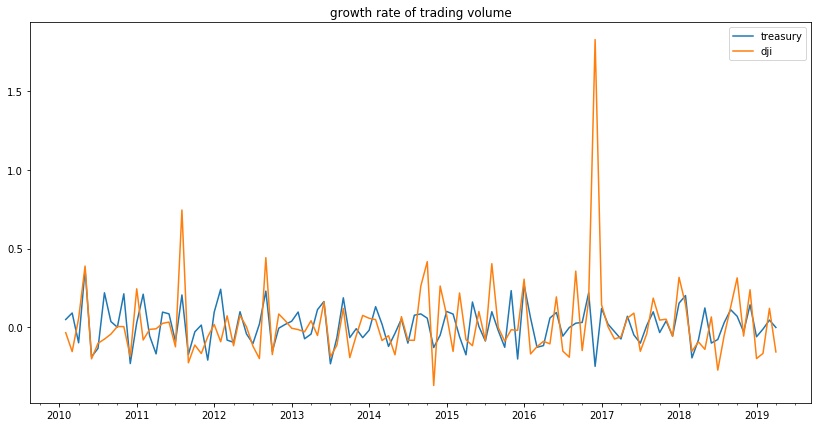

In [93]:
growth=df.pct_change()
growth.plot(figsize=(14,7),title='Growth rate of trading volume')
plt.show()
%matplotlib inline
import mpld3
mpld3.enable_notebook()